In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

D= 5
ps = []
cov_1 = 100*np.eye(D)

cov_2 = .001*np.eye(D)


catch_up = False
mean_vec_1 = np.zeros(D)
mean_vec_1[1:4] = 100



for i in range(100):
            
    
  
    
    alphas_1 = np.random.multivariate_normal(mean_vec_1,cov_1)
    alphas_2 = np.random.multivariate_normal(mean_vec_2,cov_2)

    A = np.eye(len(alphas_1))
    A[1,3] = 1
    A[2,1] = 1
    A[3,2] = 1
    A[1,1] = 0
    A[2,2] = 0
    A[3,3] = 0
    A[4,4] = 1
    A = np.transpose(A)
    
    B = np.eye(D)
    mean_vec_1 = np.dot(A,alphas_1)
    
    mean_vec_2 = 1*np.dot(B,alphas_2)

    
    
    if True:#np.random.binomial(1,.65) == 1:
        #print (np.exp(alphas_1))
        ps.append(np.random.dirichlet(np.exp(alphas_1)))
        
    else:
        #print (np.exp(alphas_2))
        ps.append(np.random.dirichlet(np.exp(alphas_2)))
        
    
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['lines.linewidth']=1
plt.rcParams['axes.facecolor']='w'

n_t_d = []
with open("province-biweek_with_delays.csv") as f:
    i = 0
    for line in f.readlines():
        if i > 0:
            n_t_d.append(line.replace("\n","").split(','))
        i+=1

n_t_d_1 = []

for elm in n_t_d:
    if elm[2] == "10":
        n_t_d_1.append(elm)


index_to_dates = {}
dates_to_index = {}
count = 0
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        index_to_dates[count] = str(i)+str(j)
        dates_to_index[str(i)+str(j)] = count
        count +=1
        
reporting_matrix = np.zeros((26*3,26*3))

for elm in n_t_d_1:
    try:
        sick_date = elm[0]+elm[1]
        report_date = elm[-2] + elm[-1]
        cases = elm[3]
        reporting_matrix_row = dates_to_index[sick_date] 
        reporting_matrix_col =  dates_to_index[report_date] 
        reporting_matrix[reporting_matrix_row,reporting_matrix_col] = int(cases)
    except:
        pass
np.set_printoptions(suppress=True)    #np.set_printoptions(threshold=np.nan)

D=26
n_t_d = np.zeros((len(reporting_matrix),D))

for i in range(len(reporting_matrix)):
    for j in range(i,i+D):
        try:
            n_t_d[i,j-i] = reporting_matrix[i][j]
        except:
            pass
n_t_d = n_t_d 
p_hat = []
from matplotlib.pyplot import cm

for i in range(len(n_t_d)):
    p_hat.append(n_t_d[i]/(np.sum(n_t_d[i])))
    
# p_hat = np.array(p_hat)
# print (p_hat)
# print (np.var(p_hat[:2]))
# plt.figure(figsize=(8,8))
# plt.ylabel("Bi-week")
# plt.xlabel("d")
# plt.imshow(p_hat,aspect='auto',cmap=cm.Blues)
# plt.legend()
# plt.colorbar()
# plt.show()
np.set_printoptions(threshold=np.nan)
np.set_printoptions(suppress=True)
np.savetxt("n_t_d.csv",n_t_d,delimiter=",")
p_hat = np.array(p_hat)
p_hat[np.isnan(p_hat)] = 0
maxs = []
for t in range(len(p_hat)):

    print (t,np.sum(p_hat[t][10:D]))
    


(0, 0.046242774566473986)
(1, 0.024630541871921183)
(2, 0.005263157894736842)
(3, 0.020689655172413793)
(4, 0.010101010101010102)
(5, 0.007633587786259542)
(6, 0.012345679012345678)
(7, 0.0)
(8, 0.0)
(9, 0.0)
(10, 0.0)
(11, 0.0)
(12, 0.005714285714285714)
(13, 0.0)
(14, 0.0)
(15, 0.006024096385542169)
(16, 0.0)
(17, 0.0)
(18, 0.0)
(19, 0.0)
(20, 0.0)
(21, 0.0)
(22, 0.0)
(23, 0.0)
(24, 0.0)
(25, 0.0)
(26, 0.0)
(27, 0.010752688172043012)
(28, 0.0)
(29, 0.004975124378109453)
(30, 0.004807692307692308)
(31, 0.0)
(32, 0.0)
(33, 0.009708737864077669)
(34, 0.0037174721189591076)
(35, 0.0)
(36, 0.0017667844522968198)
(37, 0.00398406374501992)
(38, 0.0019801980198019802)
(39, 0.004437869822485207)
(40, 0.003875968992248062)
(41, 0.0)
(42, 0.002525252525252525)
(43, 0.00437636761487965)
(44, 0.004918032786885246)
(45, 0.002070393374741201)
(46, 0.0025673940949935813)
(47, 0.003114052160373686)
(48, 0.002102312543798178)
(49, 0.0025755494505494505)
(50, 0.0013930810308799629)
(51, 0.0)
(52, 0.0)


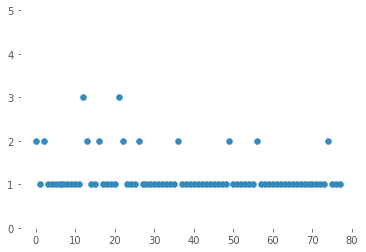

ValueError: x and y must be the same size

In [123]:
ps = np.array(p_hat)

log_ratio_ps = []

for p in ps:
    tmp = []
    
    for j in range(1,len(p)):
        tmp_val = np.log( (p[j])/(p[0]))
        #print (tmp_val)
       
        tmp.append(tmp_val)

    log_ratio_ps.append(tmp)

#print (log_ratio_ps)
log_ratio_ps = np.array(log_ratio_ps)


max_log_ratio = []
for i in range(len(log_ratio_ps[:,1])):
    max_ = np.argmax([log_ratio_ps[i,1],log_ratio_ps[i,2],log_ratio_ps[i,3],log_ratio_ps[i,4]])
    #print (max_)
    max_log_ratio.append(max_+1)
plt.scatter(range(len(log_ratio_ps)),max_log_ratio)

#plt.legend(("p1","p2","p3","p4"))


plt.ylim(0,5)
plt.show()

plt.scatter(range(len(log_ratio_ps[:,1])),log_ratio_ps[:,1:4])
plt.legend(("p1","p2","p3"))
plt.show()

    

In [ ]:
pm.traceplot(trace_rw)
plt.show()

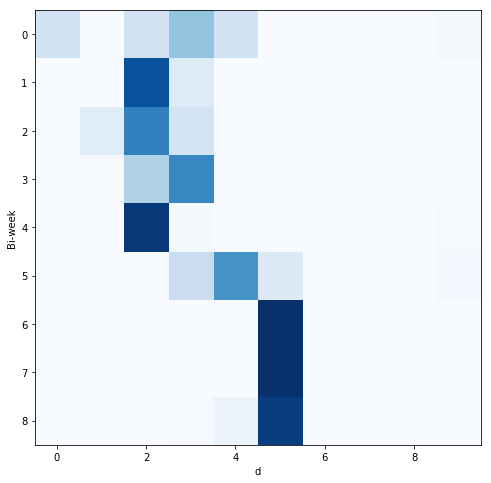

In [71]:
sigma_alpha = np.mean(trace_rw['sigma_alpha'])
mu = np.zeros(D-1)
cov = sigma_alpha*np.eye(D-1)
unfolded_y_pred=[]
for i in range(len(y_pred)):
    
    y_pred =  np.random.multivariate_normal(mu,cov)
    tmp = []
    inv_logs = np.exp(y_pred)
    last_one = 1./(sum(inv_logs) + 1)
    unfolded_y_pred.append(np.append(inv_logs*last_one,last_one))
    mu = y_pred
unfolded_y_pred = np.array(unfolded_y_pred)  
plt.figure(figsize=(8,8))
plt.ylabel("Bi-week")
plt.xlabel("d")
#plt.xticks(0,199,1)
plt.imshow(unfolded_y_pred,aspect='auto',cmap=cm.Blues)
plt.show()
    

In [143]:
import pymc3 as pm
from theano import scan, shared

import numpy as np
"""
ARMA example
It is interesting to note just how much more compact this is than the original STAN example
The original implementation is in the STAN documentation by Gelman et al and is reproduced below
Example from STAN- slightly altered
data {
  int<lower=1> T;
  real y[T];
}
parameters {
    // assume err[0] == 0
}
nu[t] <- mu + phi * y[t-1] + theta * err[t-1];
  err[t] <- y[t] - nu[t];
}
mu ~ normal(0,10);
phi ~ normal(0,2);
theta ~ normal(0,2);
  real mu;
  real phi;
  real theta;
  real<lower=0> sigma;
} model {
  vector[T] nu;
  vector[T] err;
  nu[1] <- mu + phi * mu;
  err[1] <- y[1] - nu[1];
  for (t in 2:T) {
    // num observations
    // observed outputs
    // mean coeff
    // autoregression coeff
    // moving avg coeff
    // noise scale
    // prediction for time t
    // error for time t
sigma ~ cauchy(0,5);
err ~ normal(0,sigma);
// priors
// likelihood
Ported to PyMC3 by Peadar Coyle and Chris Fonnesbeck (c) 2016.
"""


def build_model():
    y = [0]
    for i in range(1,10):
        y.append(np.random.normal(.5*y[i-1],1))
        
    y = shared(np.array(y, dtype=np.float64))
    with pm.Model() as arma_model:
        sigma = 1
        phi = pm.Normal('phi', 0., sd=1.)
        #mu = pm.Normal('mu', 0., sd=10.)

        err0 = y[0]

        def calc_next(last_y, this_y, err, phi):
            nu_t =  phi * last_y +  err
            return nu_t

        err, _ = scan(fn=calc_next,
                      sequences=dict(input=y, taps=[-1, 0]),
                      outputs_info=[err0],
                      non_sequences=[phi])

        pm.Potential('like', pm.Normal.dist(0, sd=sigma).logp(err))
    return arma_model


def run(n_samples=1000):
    model = build_model()
    with model:
        inference = pm.ADVI()
        approx = pm.fit(n=30000, method=inference)
    
    trace = approx.sample(draws=5000)
    pm.plots.traceplot(trace)
    pm.plots.forestplot(trace)
    return trace

if __name__ == '__main__':
    trace = run()

Average Loss = 9.8982: 100%|██████████| 30000/30000 [01:15<00:00, 397.46it/s]
Finished [100%]: Average Loss = 9.8999


In [146]:
pm.plots.traceplot(trace)
#plt.show()
print np.mean(trace['phi'])

0.0001669195563792047
